<a href="https://colab.research.google.com/github/aishwaryacharlapally/Student-Mental-Health-Insights-Using-Python/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df= pd.read_csv('/content/Student Mental health.csv')

print(df.head())

        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes  

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [3]:
print (df.describe())

             Age
count  100.00000
mean    20.53000
std      2.49628
min     18.00000
25%     18.00000
50%     19.00000
75%     23.00000
max     24.00000


In [4]:
print(df.isnull().sum())

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


**Cleaning the DATA**

In [6]:
# Filling missing Age valued
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [7]:
#Standardizing the columns with consistent formats
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['your_current_year_of_study'] = df['your_current_year_of_study'].str.strip().str.lower()
df['choose_your_gender'] = df['choose_your_gender'].str.strip().str.title()

In [8]:
yes_or_no_columns = ['do_you_have_depression?', 'do_you_have_anxiety?',
    'do_you_have_panic_attack?', 'did_you_seek_any_specialist_for_a_treatment?']

for col in yes_or_no_columns:
    df[col] = df[col].str.strip().str.title()


Exploratory Data Analysis

Visualization

1) How many males vs. females have depression, anxiety, and panic attacks

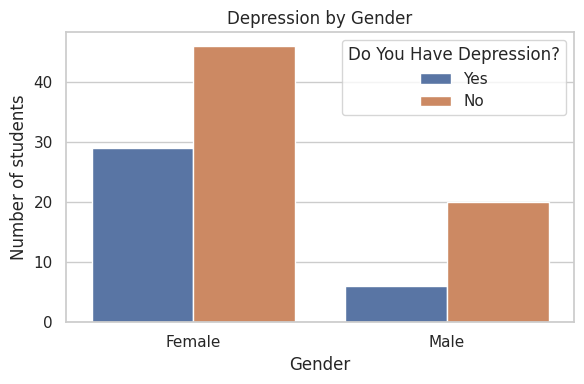

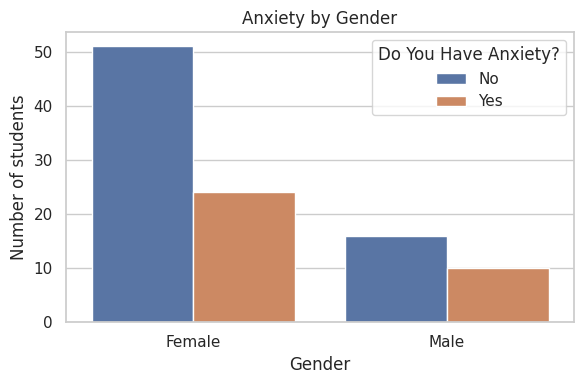

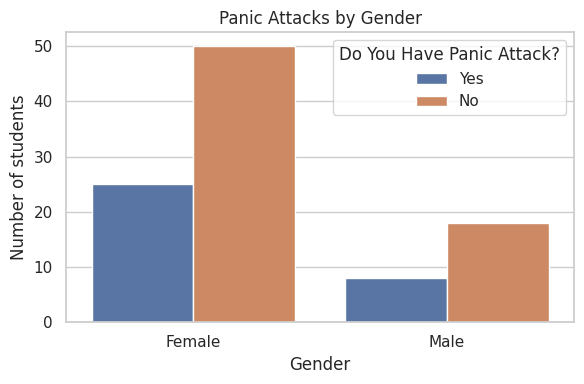

In [9]:
#Visualize this difference using bar charts

import seaborn as sns
import matplotlib.pyplot as plt

#set the Theme

sns.set(style='whitegrid')

# create a function to plot counts by gender

def plot_condition_by_gender(column,title):
  plt.figure(figsize=(6,4))
  sns.countplot(x='choose_your_gender', hue=column, data=df)
  plt.title(title)
  plt.xlabel('Gender')
  plt.ylabel('Number of students')
  plt.legend(title=column.replace('_',' ').title())
  plt.tight_layout()
  plt.show()

plot_condition_by_gender('do_you_have_depression?', "Depression by Gender")
plot_condition_by_gender('do_you_have_anxiety?', "Anxiety by Gender")
plot_condition_by_gender('do_you_have_panic_attack?', "Panic Attacks by Gender")

 Mental Health Trends by Year

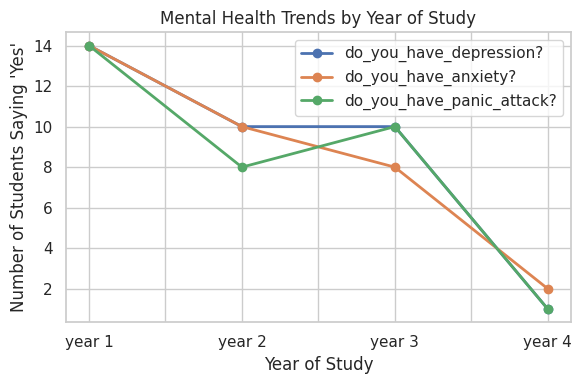

In [10]:
# Count of 'Yes' responses grouped by year
year_trend = df.groupby('your_current_year_of_study')[['do_you_have_depression?', 'do_you_have_anxiety?', 'do_you_have_panic_attack?']].apply(lambda x: (x == 'Yes').sum())

# Line plot for trends
year_trend.plot(kind='line', marker='o', figsize=(6, 4), linewidth=2)
plt.title("Mental Health Trends by Year of Study")
plt.xlabel("Year of Study")
plt.ylabel("Number of Students Saying 'Yes'")
plt.grid(True)
plt.tight_layout()
plt.show()

CGPA vs. Depression

it compares CGPA scores between students with depression ("Yes") and without ("No")

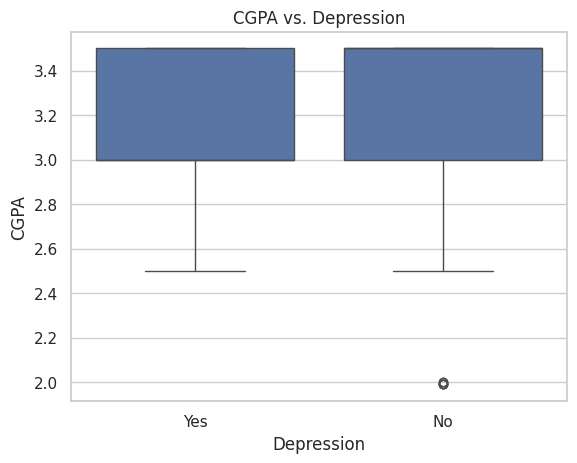

In [11]:
df['what_is_your_cgpa?'] = df['what_is_your_cgpa?'].str.extract(r'(\d+\.\d+)').astype(float)

# Box plot
sns.boxplot(x='do_you_have_depression?', y='what_is_your_cgpa?', data=df)
plt.title("CGPA vs. Depression")
plt.xlabel("Depression")
plt.ylabel("CGPA")
plt.show()

Depression Distribution

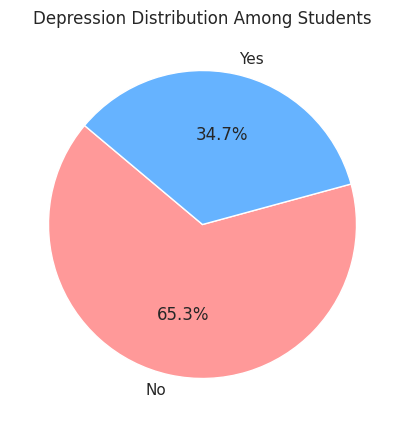

In [12]:
depression_counts = df['do_you_have_depression?'].value_counts()
labels = depression_counts.index
sizes = depression_counts.values

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff"])
plt.title("Depression Distribution Among Students")
plt.show()

CGPA vs Mental Health Issues

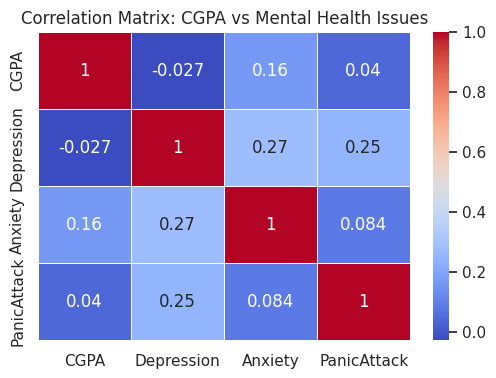

In [13]:
df['depression_binary'] = df['do_you_have_depression?'].map({'Yes': 1, 'No': 0})
df['anxiety_binary'] = df['do_you_have_anxiety?'].map({'Yes': 1, 'No': 0})
df['panic_binary'] = df['do_you_have_panic_attack?'].map({'Yes': 1, 'No': 0})

correlation_data = df[['what_is_your_cgpa?', 'depression_binary', 'anxiety_binary', 'panic_binary']].rename(columns={
    'what_is_your_cgpa?': 'CGPA',
    'depression_binary': 'Depression',
    'anxiety_binary': 'Anxiety',
    'panic_binary': 'PanicAttack'
})

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix: CGPA vs Mental Health Issues")

plt.title("Correlation Matrix: CGPA vs Mental Health Issues")
plt.show()